### PREPARACIÓN Y EDA DEL PROYECTO

In [46]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir("/Users/Iram Valdés/VS")

In [47]:
df = pd.read_csv("vgsales.csv")

In [48]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [228]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [50]:
df.sample(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
418,419,Madden NFL 16,PS4,2015.0,Sports,Electronic Arts,2.33,0.30,0.00,0.59,3.22
14804,14807,Nanotek Warrior,PS,1997.0,Shooter,Virgin Interactive,0.01,0.01,0.00,0.00,0.03
12885,12887,Bleach: Blade Battlers,PS2,2006.0,Fighting,Sony Computer Entertainment,0.00,0.00,0.05,0.00,0.05
2415,2417,The Lord of the Rings: War in the North,PS3,NaN,Action,Warner Bros. Interactive Entertainment,0.25,0.45,0.01,0.15,0.86
15393,15396,Invizimals: The Resistance,PSV,2014.0,Role-Playing,Sony Computer Entertainment,0.00,0.02,0.00,0.00,0.02


In [51]:
df.tail(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [52]:
missing_values_count = df.isnull().sum()
missing_values_count

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [40]:
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

percent_missing = (total_missing / total_cells) * 100
print(f"Porcentaje de Datos que no existe: {percent_missing:.2f}%")

Porcentaje de Datos que no existe: 0.18%


In [41]:
df_global_sales_sum = df["Global_Sales"].sum()

df_na = df[df.isna().any(axis=1)]
df_na_global_sales_sum = df_na["Global_Sales"].sum()

print("El gran total de ventas globales es: ", df_global_sales_sum)
print(f"De ese gran total, los registros con 'N/A' suman un total de: {df_na_global_sales_sum:.2f}")

percent_missing_global_sales = (df_na_global_sales_sum / df_global_sales_sum) * 100
print(f"Porcentaje de ventas con 'N/A': {percent_missing_global_sales:.2f}%")

El gran total de ventas globales es:  8920.44
De ese gran total, los registros con 'N/A' suman un total de: 108.47
Porcentaje de ventas con 'N/A': 1.22%


In [ ]:
# Se optó por hacer un "drop" por completo de las filas con NA
# ya que estas no representan un número de ventas importante o porcentaje
# significativo de datos en nuestro dataset. 

In [59]:
df = df.replace("Unknown", np.nan)

df_clean = df.dropna()

df_clean

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [56]:
df = df_clean
missing_values_count = df.isnull().sum()
missing_values_count

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [60]:
df_na

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


In [58]:
df["Name"] = df["Name"].astype("string")
df["Name"] = df["Name"].astype("string")
df["Platform"] = df["Platform"].astype("string")
df["Year"] = df["Year"].astype("int64")
df["Genre"] = df["Genre"].astype("string")
df["Publisher"] = df["Publisher"].astype("string")

In [61]:
print(df.dtypes)

Rank                     int64
Name            string[python]
Platform        string[python]
Year                     int64
Genre           string[python]
Publisher       string[python]
NA_Sales               float64
EU_Sales               float64
JP_Sales               float64
Other_Sales            float64
Global_Sales           float64
dtype: object


### TOTALES

#### Total de Videojuegos Analizados

In [88]:
df["Name"].count()

16191

#### Total de Géneros Analizados

In [84]:
df["Genre"].unique()

<StringArray>
[      'Sports',     'Platform',       'Racing', 'Role-Playing',
       'Puzzle',         'Misc',      'Shooter',   'Simulation',
       'Action',     'Fighting',    'Adventure',     'Strategy']
Length: 12, dtype: string

<function matplotlib.pyplot.show(close=None, block=None)>

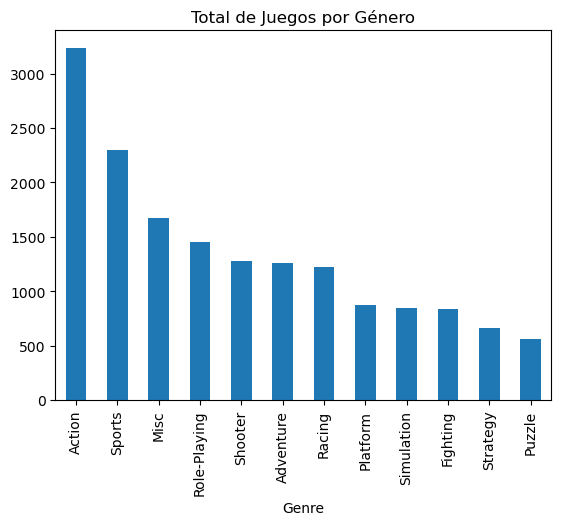

In [331]:
df.groupby("Genre")["Genre"].count().sort_values(ascending=False).plot.bar()
plt.title("Total de Juegos por Género")
plt.show

#### Plataformas Analizadas

In [89]:
df["Platform"].unique()

<StringArray>
[ 'Wii',  'NES',   'GB',   'DS', 'X360',  'PS3',  'PS2', 'SNES',  'GBA',
  '3DS',  'PS4',  'N64',   'PS',   'XB',   'PC', '2600',  'PSP', 'XOne',
   'GC', 'WiiU',  'GEN',   'DC',  'PSV',  'SAT',  'SCD',   'WS',   'NG',
 'TG16',  '3DO',   'GG', 'PCFX']
Length: 31, dtype: string

<function matplotlib.pyplot.show(close=None, block=None)>

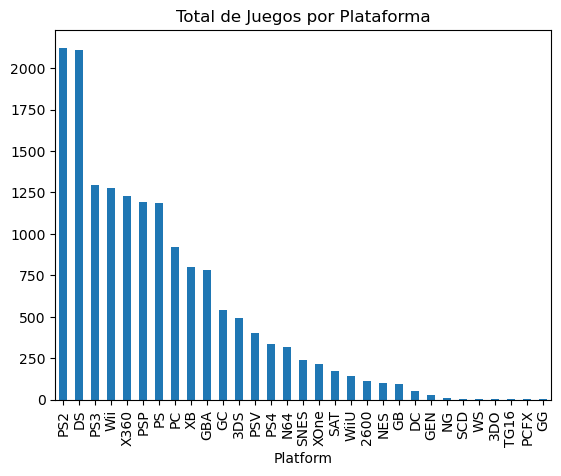

In [290]:
df.groupby("Platform")["Platform"].count().sort_values(ascending=False).plot.bar()
plt.title("Total de Juegos por Plataforma")
plt.show

### VENTAS

#### Globales

##### Total de Ventas por Año

In [218]:
df.groupby("Year")["Global_Sales"].sum()

Year
1980     11.38
1981     35.48
1982     28.86
1983     16.79
1984     50.36
1985     53.94
1986     37.07
1987     21.74
1988     47.22
1989     73.45
1990     49.39
1991     32.23
1992     76.16
1993     45.98
1994     79.17
1995     88.11
1996    199.15
1997    200.98
1998    255.64
1999    251.27
2000    201.56
2001    329.22
2002    395.42
2003    356.92
2004    413.98
2005    457.62
2006    520.92
2007    609.67
2008    678.58
2009    667.28
2010    598.49
2011    511.01
2012    363.17
2013    368.05
2014    336.65
2015    264.34
2016     70.74
2017      0.05
2020      0.29
Name: Global_Sales, dtype: float64

<Axes: xlabel='Year'>

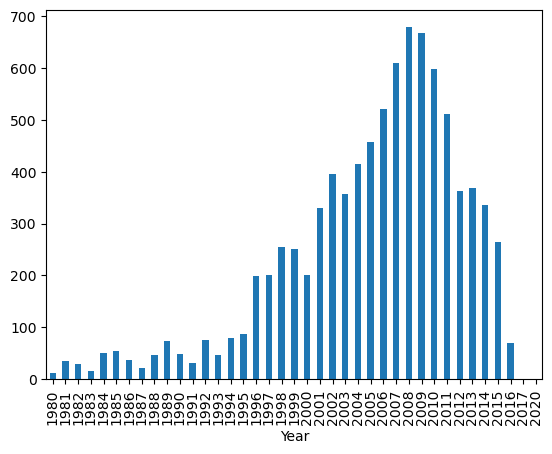

In [332]:
df.groupby("Year")["Global_Sales"].sum().plot.bar()

##### Juegos Más Vendidos por Año

In [334]:
df_most_sold_games_global = df.loc[df.groupby('Year')['Global_Sales'].idxmax()]
df_most_sold_games_global = df_most_sold_games_global.sort_values('Year').reset_index(drop=True)
df_most_sold_games_global

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
1,240,Pitfall!,2600,1981,Platform,Activision,4.21,0.24,0.00,0.05,4.50
2,90,Pac-Man,2600,1982,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
3,422,Baseball,NES,1983,Sports,Nintendo,0.73,0.10,2.35,0.02,3.20
4,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
5,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6,128,The Legend of Zelda,NES,1986,Action,Nintendo,3.74,0.93,1.69,0.14,6.51
7,252,Zelda II: The Adventure of Link,NES,1987,Adventure,Nintendo,2.19,0.50,1.61,0.08,4.38
8,23,Super Mario Bros. 3,NES,1988,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
9,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


##### Plataformas con Más Ingresos por Año

In [339]:
sales_per_year_platform = df.groupby(['Year', 'Platform']).sum().reset_index()
df_most_sold_platform_global = sales_per_year_platform.loc[sales_per_year_platform.groupby('Year')['Global_Sales'].idxmax()]
df_most_sold_platform_global = df_most_sold_platform_global[["Year", "Platform"]]
df_most_sold_platform_global

,Year,Platform
0,1980,2600
1,1981,2600
2,1982,2600
4,1983,NES
6,1984,NES
9,1985,NES
12,1986,NES
14,1987,NES
17,1988,NES
20,1989,GB


<Axes: xlabel='Platform'>

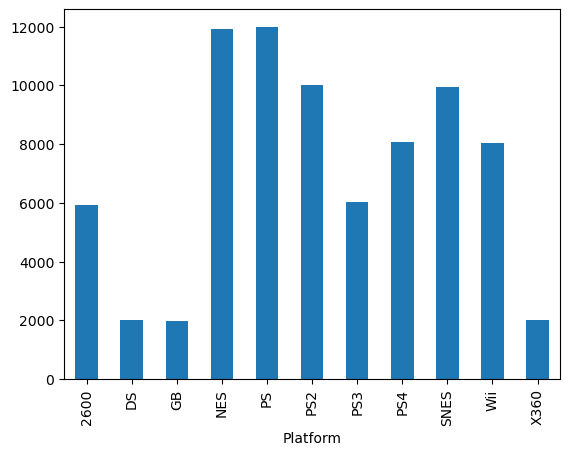

In [345]:
df_most_sold_platform_global.groupby("Platform")["Year"].sum().plot.bar()

#### NA

##### Total de Ventas por Año

In [219]:
df.groupby("Year")["NA_Sales"].sum()

Year
1980     10.59
1981     33.13
1982     26.92
1983      7.76
1984     33.28
1985     33.73
1986     12.50
1987      8.46
1988     23.87
1989     45.15
1990     25.46
1991     12.76
1992     33.87
1993     15.12
1994     28.15
1995     24.82
1996     86.76
1997     94.75
1998    127.90
1999    126.06
2000     94.49
2001    173.70
2002    216.16
2003    192.92
2004    218.78
2005    240.84
2006    263.04
2007    311.18
2008    351.21
2009    338.85
2010    303.50
2011    239.21
2012    154.89
2013    154.77
2014    131.75
2015    102.82
2016     22.66
2017      0.00
2020      0.27
Name: NA_Sales, dtype: float64

##### Juegos Más Vendidos por Año

In [186]:
df_most_sold_games_na = df.loc[df.groupby('Year')['NA_Sales'].idxmax()]
df_most_sold_games_na = df_most_sold_games_na.sort_values('Year').reset_index(drop=True)
df_most_sold_games_na

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
1,240,Pitfall!,2600,1981,Platform,Activision,4.21,0.24,0.00,0.05,4.50
2,90,Pac-Man,2600,1982,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
3,1510,Pitfall II: Lost Caverns,2600,1983,Platform,Activision,1.22,0.07,0.00,0.02,1.31
4,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
5,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6,128,The Legend of Zelda,NES,1986,Action,Nintendo,3.74,0.93,1.69,0.14,6.51
7,252,Zelda II: The Adventure of Link,NES,1987,Adventure,Nintendo,2.19,0.50,1.61,0.08,4.38
8,23,Super Mario Bros. 3,NES,1988,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
9,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


##### Plataformas con Más Ingresos por Año

In [165]:
sales_per_year_platform = df.groupby(['Year', 'Platform']).sum().reset_index()
df_most_sold_platform_na = sales_per_year_platform.loc[sales_per_year_platform.groupby('Year')['NA_Sales'].idxmax()]
df_most_sold_platform_na = df_most_sold_platform_na[["Year", "Platform"]]
df_most_sold_platform_na

,Year,Platform
0,1980,2600
1,1981,2600
2,1982,2600
3,1983,2600
6,1984,NES
9,1985,NES
12,1986,NES
14,1987,NES
17,1988,NES
20,1989,GB


#### EU

##### Total de Ventas por Año

In [220]:
df.groupby("Year")["EU_Sales"].sum()

Year
1980      0.67
1981      1.94
1982      1.65
1983      0.80
1984      2.10
1985      4.74
1986      2.84
1987      1.41
1988      6.59
1989      8.44
1990      7.63
1991      3.95
1992     11.71
1993      4.65
1994     14.88
1995     14.90
1996     47.26
1997     48.32
1998     66.59
1999     62.67
2000     52.75
2001     93.67
2002    109.72
2003    103.56
2004    105.91
2005    121.53
2006    129.22
2007    160.16
2008    184.40
2009    191.58
2010    176.38
2011    165.98
2012    118.70
2013    125.74
2014    125.52
2015     97.65
2016     26.76
2017      0.00
2020      0.00
Name: EU_Sales, dtype: float64

##### Juegos Más Vendidos por Año

In [187]:
df_most_sold_games_eu = df.loc[df.groupby('Year')['EU_Sales'].idxmax()]
df_most_sold_games_eu = df_most_sold_games_eu.sort_values('Year').reset_index(drop=True)
df_most_sold_games_eu

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
1,240,Pitfall!,2600,1981,Platform,Activision,4.21,0.24,0.00,0.05,4.50
2,90,Pac-Man,2600,1982,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
3,702,Mario Bros.,NES,1983,Platform,Nintendo,0.51,0.12,1.63,0.02,2.28
4,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
5,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6,128,The Legend of Zelda,NES,1986,Action,Nintendo,3.74,0.93,1.69,0.14,6.51
7,252,Zelda II: The Adventure of Link,NES,1987,Adventure,Nintendo,2.19,0.50,1.61,0.08,4.38
8,23,Super Mario Bros. 3,NES,1988,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
9,22,Super Mario Land,GB,1989,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14


##### Plataformas con Más Ingresos por Año

In [189]:
sales_per_year_platform = df.groupby(['Year', 'Platform']).sum().reset_index()
df_most_sold_platform_eu = sales_per_year_platform.loc[sales_per_year_platform.groupby('Year')['EU_Sales'].idxmax()]
df_most_sold_platform_eu = df_most_sold_platform_eu[["Year", "Platform"]]
df_most_sold_platform_eu

,Year,Platform
0,1980,2600
1,1981,2600
2,1982,2600
4,1983,NES
6,1984,NES
9,1985,NES
12,1986,NES
14,1987,NES
17,1988,NES
20,1989,GB


#### JP

##### Total de Ventas por Año

In [221]:
df.groupby("Year")["JP_Sales"].sum()

Year
1980     0.00
1981     0.00
1982     0.00
1983     8.10
1984    14.27
1985    14.56
1986    19.81
1987    11.63
1988    15.76
1989    18.36
1990    14.88
1991    14.78
1992    28.91
1993    25.33
1994    33.99
1995    45.75
1996    57.44
1997    48.87
1998    50.04
1999    52.34
2000    42.77
2001    39.44
2002    41.70
2003    34.20
2004    41.65
2005    54.28
2006    73.71
2007    60.06
2008    60.18
2009    61.89
2010    58.72
2011    51.72
2012    51.52
2013    47.59
2014    39.46
2015    33.68
2016    13.51
2017     0.05
2020     0.00
Name: JP_Sales, dtype: float64

##### Juegos Más Vendidos por Año

In [191]:
df_most_sold_games_jp = df.loc[df.groupby('Year')['JP_Sales'].idxmax()]
df_most_sold_games_jp = df_most_sold_games_jp.sort_values('Year').reset_index(drop=True)
df_most_sold_games_jp

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
1,240,Pitfall!,2600,1981,Platform,Activision,4.21,0.24,0.00,0.05,4.50
2,90,Pac-Man,2600,1982,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
3,422,Baseball,NES,1983,Sports,Nintendo,0.73,0.10,2.35,0.02,3.20
4,299,Golf,NES,1984,Sports,Nintendo,1.22,0.28,2.46,0.04,4.01
5,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6,574,Super Mario Bros.: The Lost Levels,NES,1986,Platform,Nintendo,0.00,0.00,2.65,0.00,2.65
7,603,Dragon Warrior II,NES,1987,Role-Playing,Enix Corporation,0.15,0.00,2.41,0.00,2.56
8,23,Super Mario Bros. 3,NES,1988,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
9,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


##### Plataformas con Más Ingresos por Año

In [192]:
sales_per_year_platform = df.groupby(['Year', 'Platform']).sum().reset_index()
df_most_sold_platform_jp = sales_per_year_platform.loc[sales_per_year_platform.groupby('Year')['JP_Sales'].idxmax()]
df_most_sold_platform_jp = df_most_sold_platform_jp[["Year", "Platform"]]
df_most_sold_platform_jp

,Year,Platform
0,1980,2600
1,1981,2600
2,1982,2600
4,1983,NES
6,1984,NES
9,1985,NES
12,1986,NES
14,1987,NES
17,1988,NES
20,1989,GB


#### Otros

##### Total de Ventas por Año

In [222]:
df.groupby("Year")["Other_Sales"].sum()

Year
1980     0.12
1981     0.32
1982     0.31
1983     0.14
1984     0.70
1985     0.92
1986     1.93
1987     0.20
1988     0.99
1989     1.50
1990     1.40
1991     0.74
1992     1.65
1993     0.89
1994     2.20
1995     2.64
1996     7.69
1997     9.13
1998    10.98
1999    10.05
2000    11.62
2001    22.42
2002    27.28
2003    25.99
2004    47.24
2005    40.43
2006    54.43
2007    77.58
2008    82.37
2009    74.77
2010    59.85
2011    54.03
2012    37.82
2013    39.82
2014    39.99
2015    30.01
2016     7.75
2017     0.00
2020     0.02
Name: Other_Sales, dtype: float64

##### Juegos Más Vendidos por Año

In [194]:
df_most_sold_games_other = df.groupby('Year', as_index=False).apply(lambda x: x.loc[x['Other_Sales'].idxmax()])
df_most_sold_games_other = df_most_sold_games_other.sort_values('Year').reset_index(drop=True)
df_most_sold_games_other

C:\Users\Iram Valdés\AppData\Local\Temp\ipykernel_12116\2651019390.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_most_sold_games_other = df.groupby('Year', as_index=False).apply(lambda x: x.loc[x['Other_Sales'].idxmax()])


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
1,240,Pitfall!,2600,1981,Platform,Activision,4.21,0.24,0.00,0.05,4.50
2,90,Pac-Man,2600,1982,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
3,422,Baseball,NES,1983,Sports,Nintendo,0.73,0.10,2.35,0.02,3.20
4,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
5,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6,612,Dragon Warrior,NES,1986,Role-Playing,Capcom,0.49,0.00,0.52,1.51,2.52
7,252,Zelda II: The Adventure of Link,NES,1987,Adventure,Nintendo,2.19,0.50,1.61,0.08,4.38
8,23,Super Mario Bros. 3,NES,1988,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
9,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


##### Plataformas con Más Ingresos por Año

In [195]:
sales_per_year_platform = df.groupby(['Year', 'Platform']).sum().reset_index()
df_most_sold_platform_other = sales_per_year_platform.loc[sales_per_year_platform.groupby('Year')['Other_Sales'].idxmax()]
df_most_sold_platform_other = df_most_sold_platform_na[["Year", "Platform"]]
df_most_sold_platform_other

,Year,Platform
0,1980,2600
1,1981,2600
2,1982,2600
4,1983,NES
6,1984,NES
9,1985,NES
12,1986,NES
14,1987,NES
17,1988,NES
20,1989,GB


#### Gráfico Comparación de Ventas por Año

<Axes: xlabel='Year'>

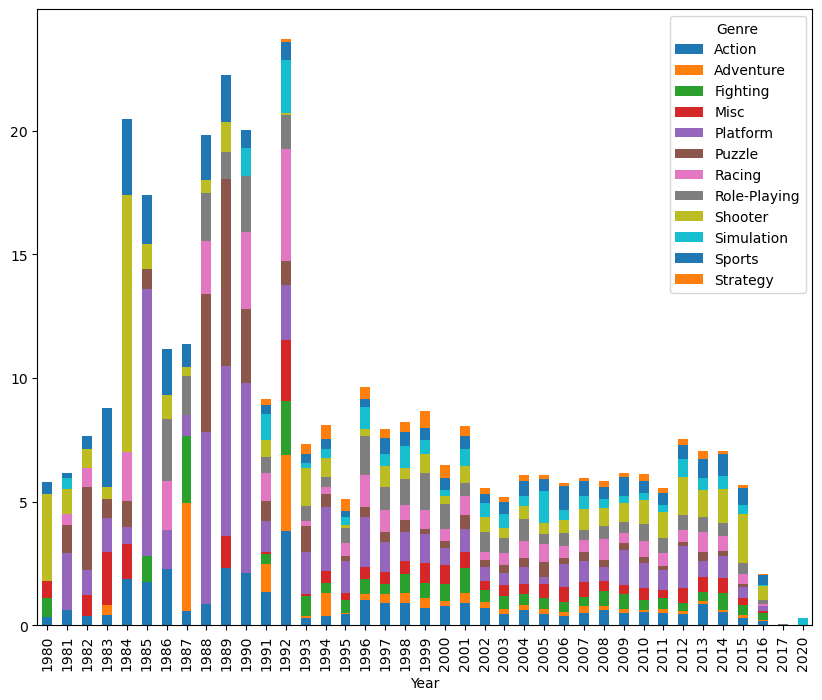

In [217]:
df_genre_sales_year = df.groupby(["Year", "Genre"])["Global_Sales"].mean().sort_values(ascending=False)
df_genre_sales_year.unstack().plot.bar(stacked=True, figsize=(10, 8))

### INSIGHTS

#### Comparando los 2 siguientes gráficos, podemos deducir que Nintendo ha sido el actor principal irrefutable en el hecho de ser el Publisher que ha dictado el curso de ventas totales globales año tras año

<function matplotlib.pyplot.show(close=None, block=None)>

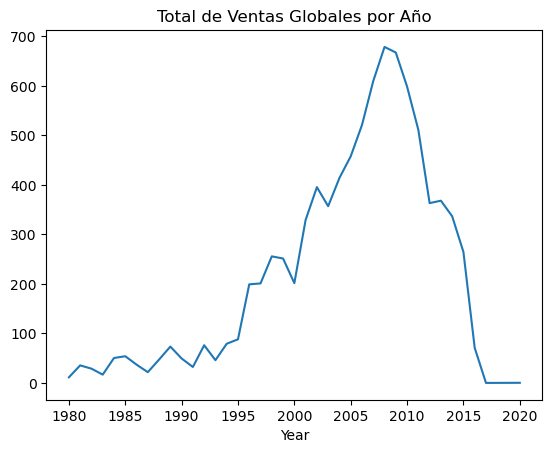

In [225]:
df.groupby("Year")["Global_Sales"].sum().plot.line()
plt.title("Total de Ventas Globales por Año")
plt.show

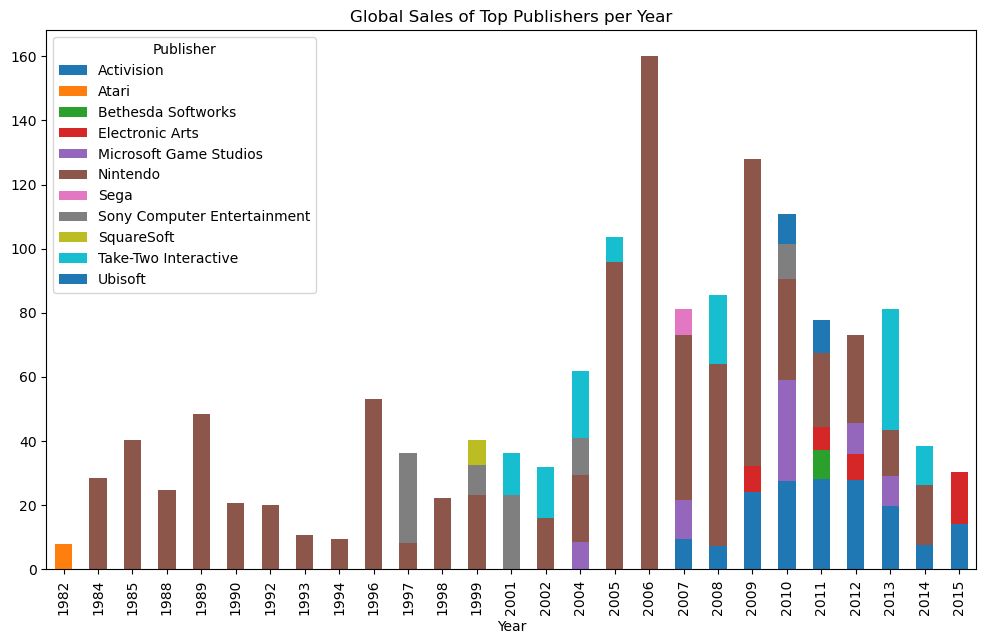

In [236]:
df_top100_publisher = df.sort_values("Global_Sales", ascending=False).head(100)
df_top100_publisher_group = df_top100_publisher.groupby(["Year", "Publisher"])["Global_Sales"].sum().unstack()
df_top100_publisher_group.plot(kind="bar", stacked=True, figsize=(12, 7))

plt.title('Global Sales of Top Publishers per Year')
plt.show()

### CRECIMIENTO (ÚLTIMOS 4 AÑOS)

#### Se realizará el análisis pretendiendo estar en el año 2020 para así tomar datos desde el 2016 ya que si se toman datos de 4 años previos a partir del 2024, solo tendremos 1 registro disponible (perteneciente al año 2020)

In [248]:
df_growth = df[df["Year"] >= 2016]
df_growth

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
221,222,FIFA 17,PS4,2016,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77
271,272,Uncharted 4: A Thief's End,PS4,2016,Shooter,Sony Computer Entertainment,1.30,2.07,0.18,0.65,4.20
351,352,Tom Clancy's The Division,PS4,2016,Shooter,Ubisoft,1.28,1.61,0.15,0.57,3.61
770,772,Far Cry: Primal,PS4,2016,Action,Ubisoft,0.59,1.16,0.06,0.33,2.13
845,847,Tom Clancy's The Division,XOne,2016,Shooter,Ubisoft,1.20,0.62,0.00,0.18,2.01
...,...,...,...,...,...,...,...,...,...,...,...
16562,16565,Mighty No. 9,XOne,2016,Platform,Deep Silver,0.01,0.00,0.00,0.00,0.01
16569,16572,Resident Evil 4 HD,XOne,2016,Shooter,Capcom,0.01,0.00,0.00,0.00,0.01
16570,16573,Farming 2017 - The Simulation,PS4,2016,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01
16576,16579,Rugby Challenge 3,XOne,2016,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01


#### Género con Mayor y Menor Crecimiento

<Axes: xlabel='Genre'>

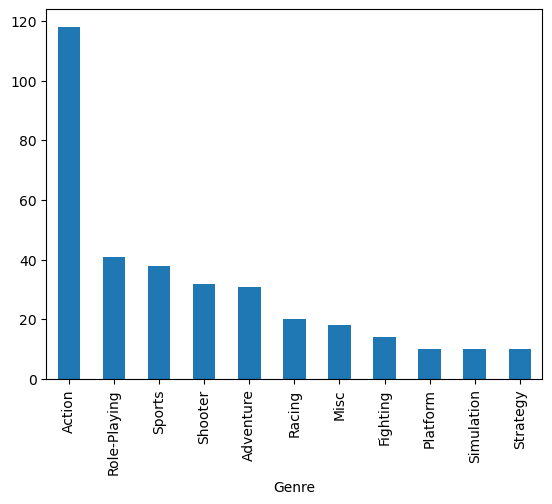

In [303]:
df_growth.groupby("Genre")["Genre"].count().sort_values(ascending= False).plot.bar()

#### Plataforma con Mayor y Menor Crecimiento

<Axes: xlabel='Platform'>

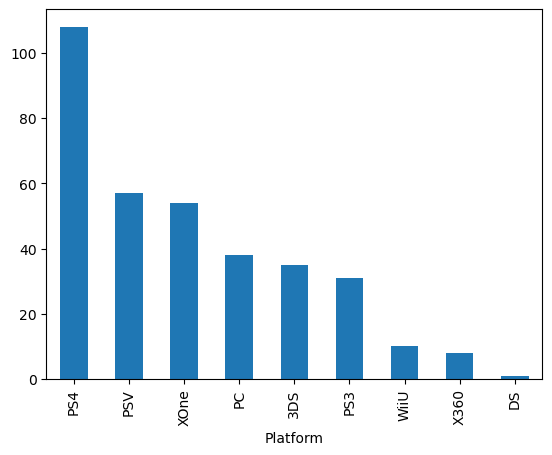

In [302]:
df_growth.groupby("Platform")["Global_Sales"].count().sort_values(ascending=False).plot.bar()

#### Videojuego con Mayor y Menor Crecimiento

In [304]:
df_growth.groupby("Name")["Global_Sales"].count().sort_values(ascending=False)

Name
LEGO Marvel's Avengers                7
Lego Star Wars: The Force Awakens     7
FIFA 17                               5
Madden NFL 17                         4
Attack on Titan (KOEI)                4
                                     ..
Hyakka Hyakurou: Sengoku Ninpoujou    1
Hyrule Warriors                       1
Imagine: Makeup Artist                1
Kamigami no Asobi InFinite            1
ZombiU                                1
Name: Global_Sales, Length: 207, dtype: int64

### OPORTUNIDADES DE MERCADO

##### Las gráficas de abajo nos muestran que sería sensato invertir en acciones de los 10 Publishers con mayor cantidad de videojuegos publicados y también invertir teniendo en constante vigilancia el comportamiento de Nintendo ya que representa una muy considerable cantidad de ventas globales año tras año a pesar de que no publiquen tantos títulos como otros Publishers

<function matplotlib.pyplot.show(close=None, block=None)>

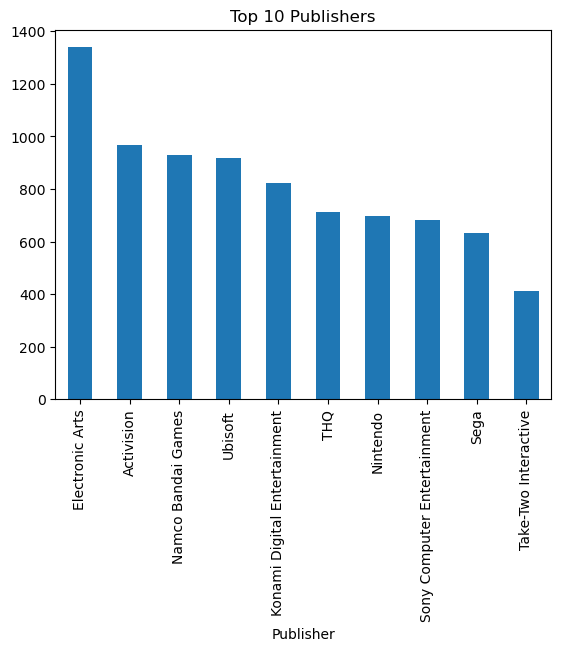

In [326]:
df.groupby("Publisher")["Publisher"].count().sort_values(ascending=False).head(10).plot.bar()
plt.title("Top 10 Publishers")
plt.show

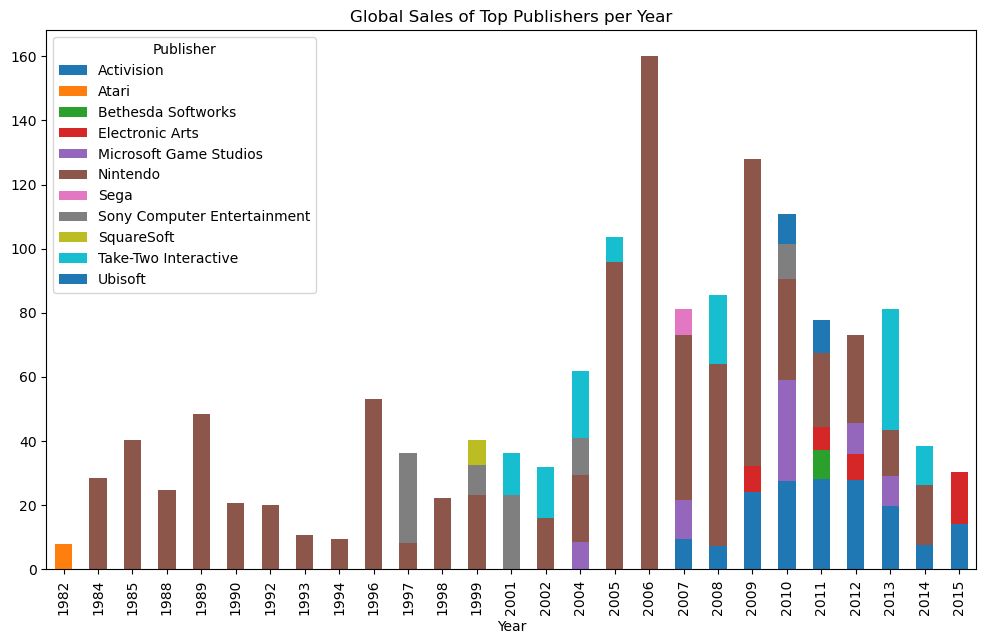

In [329]:
df_top100_publisher = df.sort_values("Global_Sales", ascending=False).head(100)
df_top100_publisher_group = df_top100_publisher.groupby(["Year", "Publisher"])["Global_Sales"].sum().unstack()
df_top100_publisher_group.plot(kind="bar", stacked=True, figsize=(12, 7))

plt.title('Global Sales of Top Publishers per Year')
plt.show()